# Journo-Jobs

Being an accurate representation of the analysis required for our Journo-Jobs paper at Future of Journalism 2017

In [192]:
%matplotlib inline

# import some things we need

# stdlib
import os
import csv
import json
from datetime import datetime
from collections import defaultdict, Counter

#external libraries
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from fuzzywuzzy import fuzz
from fuzzywuzzy import process

# set some settings for MatPlotLib plots
# plt.style.use('seaborn-whitegrid')
mpl.rcdefaults()
mpl.rcParams['font.size'] = 16
mpl.rcParams['figure.figsize'] = (14,10)
mpl.rcParams['axes.grid'] = True


In [157]:
# then we define the things we need

DATA_DIR = os.path.join(os.getcwd(), os.pardir, 'data')
print(DATA_DIR)

OUTPUT_DIR = os.path.join(os.getcwd(), os.pardir, 'output')
print(OUTPUT_DIR)

CSV_OUTPUT_DIR = os.path.join(OUTPUT_DIR, 'csv')
print(CSV_OUTPUT_DIR)

FIGURE_OUTPUT_DIR = os.path.join(OUTPUT_DIR, 'figures')
print(FIGURE_OUTPUT_DIR)

JSON_OUTPUT_DIR = os.path.join(OUTPUT_DIR, 'json')
print(JSON_OUTPUT_DIR)

for directory in [OUTPUT_DIR, CSV_OUTPUT_DIR, FIGURE_OUTPUT_DIR, JSON_OUTPUT_DIR]:
    if not os.path.exists(directory):
        os.makedirs(directory)

/Users/martin/Dropbox/Coding/curop-jobs/analysis/../data
/Users/martin/Dropbox/Coding/curop-jobs/analysis/../output
/Users/martin/Dropbox/Coding/curop-jobs/analysis/../output/csv
/Users/martin/Dropbox/Coding/curop-jobs/analysis/../output/figures
/Users/martin/Dropbox/Coding/curop-jobs/analysis/../output/json


## Loading the data

First we need to read the list of json files in the directory, then read the data in

In [5]:
file_names = [f for f in os.listdir(DATA_DIR) if f.endswith('.json')]
print(file_names)

['gorkana_2017-Apr-07--17-40-02.json', 'gorkana_2017-Apr-14--17-40-02.json', 'gorkana_2017-Apr-21--17-40-02.json', 'gorkana_2017-Apr-28--17-40-02.json', 'gorkana_2017-Aug-04--17-40-02.json', 'gorkana_2017-Aug-11--17-40-02.json', 'gorkana_2017-Aug-18--17-40-02.json', 'gorkana_2017-Feb-03--17-40-02.json', 'gorkana_2017-Feb-10--17-40-02.json', 'gorkana_2017-Feb-17--17-40-02.json', 'gorkana_2017-Feb-24--17-40-02.json', 'gorkana_2017-Jul-07--17-40-02.json', 'gorkana_2017-Jul-14--17-40-02.json', 'gorkana_2017-Jul-21--17-40-02.json', 'gorkana_2017-Jul-28--17-40-02.json', 'gorkana_2017-Jun-02--17-40-02.json', 'gorkana_2017-Jun-09--17-40-02.json', 'gorkana_2017-Jun-16--17-40-02.json', 'gorkana_2017-Jun-23--17-40-02.json', 'gorkana_2017-Jun-30--17-40-02.json', 'gorkana_2017-Mar-03--17-40-02.json', 'gorkana_2017-Mar-10--17-40-02.json', 'gorkana_2017-Mar-17--17-40-02.json', 'gorkana_2017-Mar-24--17-40-02.json', 'gorkana_2017-Mar-31--17-40-02.json', 'gorkana_2017-May-05--17-40-02.json', 'gorkana_20

Of course, we didn't use an ISO standard when we wrote the date into the filename because we're not that clever. Lets split the filename up into the source and the date, and read the files into a data structure, organised by source, then date. We'll print the count for each source and date, just for info

In [37]:
DATE_FORMAT = '%Y-%b-%d--%H-%M-%S'

source2date2jobs = defaultdict(dict)
dates = set()

for f in file_names:
    f_str = f.replace('.json', '')
    first_underscore = f_str.find('_')
    source = f_str[:first_underscore]
    print(source)
    date_string = f_str[first_underscore+1:]
    print(date_string)
    f_date = datetime.strptime(date_string, DATE_FORMAT)
    print(f_date)
    f_date_only = f_date.date()
    print(f_date_only)
    source2date2jobs[source][f_date_only] = json.load(open(os.path.join(DATA_DIR, f), 'r'))
    dates.add(f_date_only)

for source, dates in source2date2jobs.items():
    for date, jobs in source2date2jobs[source].items():
        print(source, date, len(jobs))

gorkana
2017-Apr-07--17-40-02
2017-04-07 17:40:02
2017-04-07
gorkana
2017-Apr-14--17-40-02
2017-04-14 17:40:02
2017-04-14
gorkana
2017-Apr-21--17-40-02
2017-04-21 17:40:02
2017-04-21
gorkana
2017-Apr-28--17-40-02
2017-04-28 17:40:02
2017-04-28
gorkana
2017-Aug-04--17-40-02
2017-08-04 17:40:02
2017-08-04
gorkana
2017-Aug-11--17-40-02
2017-08-11 17:40:02
2017-08-11
gorkana
2017-Aug-18--17-40-02
2017-08-18 17:40:02
2017-08-18
gorkana
2017-Feb-03--17-40-02
2017-02-03 17:40:02
2017-02-03
gorkana
2017-Feb-10--17-40-02
2017-02-10 17:40:02
2017-02-10
gorkana
2017-Feb-17--17-40-02
2017-02-17 17:40:02
2017-02-17
gorkana
2017-Feb-24--17-40-02
2017-02-24 17:40:02
2017-02-24
gorkana
2017-Jul-07--17-40-02
2017-07-07 17:40:02
2017-07-07
gorkana
2017-Jul-14--17-40-02
2017-07-14 17:40:02
2017-07-14
gorkana
2017-Jul-21--17-40-02
2017-07-21 17:40:02
2017-07-21
gorkana
2017-Jul-28--17-40-02
2017-07-28 17:40:02
2017-07-28
gorkana
2017-Jun-02--17-40-02
2017-06-02 17:40:02
2017-06-02
gorkana
2017-Jun-09--17-

In [43]:

# write out one file per source of jobs

headers = ['date', 'count']
for source, dates in source2date2jobs.items():
    
    source_data = []
    with open(os.path.join(CSV_OUTPUT_DIR, '%s.csv' % source), 'w') as output_file:
    
        writer = csv.DictWriter(output_file, headers)
        writer.writeheader()
        for date, jobs in source2date2jobs[source].items():
            source_data.append({'date': date, 'count': len(jobs)})
        writer.writerows(source_data)
        

def get_num_jobs_for_date(data, source, date):
    return len(data[source][date]) if data[source].get(date) else 0
        
        
# write a combined file
headers = ['date', 'htfp', 'gorkana', 'journalism']
rows = []
with open(os.path.join(CSV_OUTPUT_DIR, 'combined_count.csv'), 'w') as output_file:
    
    writer = csv.DictWriter(output_file, headers)
    writer.writeheader()
    
    for date in dates:
        row = {
               'date': date, 
               'htfp': get_num_jobs_for_date(source2date2jobs, 'htfp', date),
               'gorkana': get_num_jobs_for_date(source2date2jobs, 'gorkana', date),
               'journalism': get_num_jobs_for_date(source2date2jobs, 'journalism', date)
              }
        rows.append(row)
    writer.writerows(rows)

    
    
        

In [50]:
# read in our combined data
combined_data = pd.read_csv(os.path.join(CSV_OUTPUT_DIR, 'combined_count.csv'), index_col=0, parse_dates=True)
combined_data = combined_data.sort_index()
print(combined_data)

            htfp  gorkana  journalism
date                                 
2017-02-02    55        0          69
2017-02-03    63      222          69
2017-02-10    71      211          73
2017-02-17    61      211          56
2017-02-24    47      193          63
2017-03-03    50      176          56
2017-03-10    48      165          61
2017-03-17    50      164          65
2017-03-24    49      161          62
2017-03-31    48      197          63
2017-04-07    48      189          70
2017-04-21    38      187          62
2017-04-28    43      190          70
2017-05-05    37      186          55
2017-05-12    47      200          58
2017-05-19    49      212          75
2017-05-26    53      201          70
2017-06-02    47      195          73
2017-06-09    54      205          66
2017-06-16    48      204          55
2017-06-23    45      203          50
2017-06-30    40      215          45
2017-07-07    36      208          55
2017-07-14    37      200          45
2017-07-21  

In [71]:
print(plt.style.available)

['classic', 'seaborn-darkgrid', 'seaborn-ticks', 'seaborn-paper', 'dark_background', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-poster', 'ggplot', 'seaborn-dark', 'seaborn-muted', 'seaborn-deep', 'seaborn-notebook', 'seaborn-bright', 'seaborn', 'bmh', '_classic_test', 'fivethirtyeight', 'grayscale', 'seaborn-whitegrid', 'seaborn-talk', 'seaborn-pastel', 'seaborn-white']


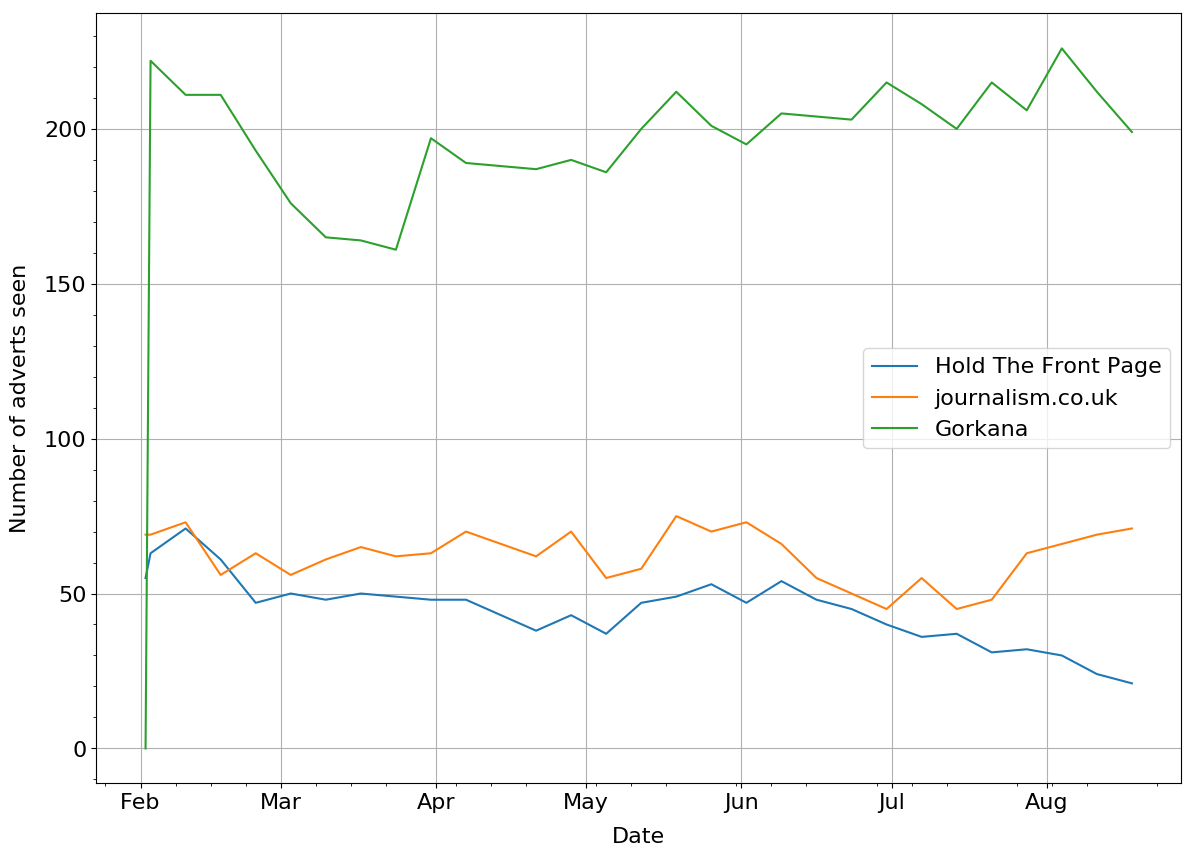

In [126]:
fig, ax = plt.subplots()

date_format = mdates.DateFormatter('%b')
ax.xaxis.set_major_formatter(date_format)
ax.minorticks_on()
ax.set_ylabel('Number of adverts seen', labelpad=10)
ax.set_xlabel('Date', labelpad=10)

ax.plot(combined_data.index, combined_data['htfp'], label='Hold The Front Page')
ax.plot(combined_data.index, combined_data['journalism'], label='journalism.co.uk')
ax.plot(combined_data.index, combined_data['gorkana'], label='Gorkana')

ax.legend()
plt.show()


Of course, some of these adverts will be duplicates, and will be repeated from week to week, so we need to reduce to unique adverts only

In [136]:
# let's have a look at an advert from gorkana

a_job = source2date2jobs['gorkana'][list(dates)[0]][0]
print(json.dumps(a_job, sort_keys=True, indent=4, ensure_ascii=False))

{
    "Details": "\nPOLITICO is looking for experienced editors to join a dynamic group of journalists in Brussels and beyond. Ideal candidates will have sharp hands-on editing skills, a passion for digital journalism and proven leadership skills.\n\r\nThese are busy, hands-on editing jobs that will involve close coordination with teams in Brussels and across Europe to produce quality articles for a sophisticated readership on POLITICO.eu, our PRO subscription service and the weekly paper edition.\n\nQualifications\nExperienced editor or senior reporter/correspondent; knowledge of European politics and policy; strong English-language writing and editing skills; ability to work under pressure and on deadline; knowledge of other European languages is a plus.\n\nEqual Opportunity\n\nIt is POLITICO's policy to provide equal employment opportunity to all qualified individuals without regard to race, color, religion, national origin, gender, age or any other characteristic protected by local

In [132]:
# let's have a look at an advert from journalism

a_job = source2date2jobs['journalism'][list(dates)[0]][0]
print(json.dumps(a_job, sort_keys=True, indent=4, ensure_ascii=False))

{
    "Details": "The Sun's digital team is growing, and we want the most talented and committed digital journalists to join us.\nThe successful candidate will:\n\n\nAct as a daily go-to person for journalists and reporters seeking advice or improvements to articles\n\n\nReport each morning on the top SEO keywords driving traffic\n\n\nMake recommendations to journalists for relevant keywords and keyword combinations to target on articles\n\n\nReport each morning on top pages/articles driving SEO traffic\n\n\nPre-plan for future articles and events by building out topics and doing keyword research for upcoming exclusives or events e.g. Olympics\n\n\nMonitor trending data for newsroom suggestions and pass to editorial desks\n\n\nOptimise top pages for relevant keywords\n\n\nForward link top traffic driving pages to other more recent articles to encourage circulation\n\n\nMonitor daily output and ensure relevant cross linking in articles e.g. ensure 2 other articles links in copy, relevan

In [138]:
# let's have a look at an advert from htfp

a_job = source2date2jobs['htfp'][list(dates)[0]][0]
print(json.dumps(a_job, sort_keys=True, indent=4, ensure_ascii=False))

{
    "Details": "Job Description\n\nCaters News is looking for a brilliant reporter to join the team at our global headquarters in Birmingham, UK.\nOur journalists fill the pages of national newspapers with top-quality stories every day, and we’re on the hunt for a reporter who can hit the ground running.\nWe’re looking for a real ‘people-person’ who can start up a conversation with anyone, and get even the most reluctant interviewee to open up.\nIf you’re a switched-on, creative, and ambitious journalist who wants to see your stories published in media outlets across the globe, then it’s the ideal opportunity.\nAs with all the best jobs in journalism, having a thick skin and a sense of humour is also helpful.\nSuccessful candidates will be joining a fun, creative team with a real buzz – and an opportunity to really make a name for yourself.\nYou’ll need to have an NCTJ qualification, as well as your own transport and a driving licence.\nThe ideal candidate will have experience at an 

In [178]:
# let's enrich the jobs by adding their source and the date they were seen, and replace the newline characters with whitespace

for source, dates in source2date2jobs.items():
    for date, jobs in source2date2jobs[source].items():
        for job in jobs:
            job['DateSeen'] = date.strftime('%Y-%m-%d')
            job['Source'] = source
            job['Details'] = job['Details'].replace('\n', ' ')
            job['link'] = job['link'].split('?')[0]
            
a_job = source2date2jobs['htfp'][list(dates)[0]][0]
print(json.dumps(a_job, sort_keys=True, indent=4, ensure_ascii=False))            

{
    "DateSeen": "2017-03-10",
    "Details": "Job Description  Caters News is looking for a brilliant reporter to join the team at our global headquarters in Birmingham, UK. Our journalists fill the pages of national newspapers with top-quality stories every day, and we’re on the hunt for a reporter who can hit the ground running. We’re looking for a real ‘people-person’ who can start up a conversation with anyone, and get even the most reluctant interviewee to open up. If you’re a switched-on, creative, and ambitious journalist who wants to see your stories published in media outlets across the globe, then it’s the ideal opportunity. As with all the best jobs in journalism, having a thick skin and a sense of humour is also helpful. Successful candidates will be joining a fun, creative team with a real buzz – and an opportunity to really make a name for yourself. You’ll need to have an NCTJ qualification, as well as your own transport and a driving licence. The ideal candidate will h

In [179]:
count = defaultdict(int)

for source, dates in source2date2jobs.items():
    for date, jobs in source2date2jobs[source].items():
        count[source] += len(jobs)
print(count)
        

defaultdict(<class 'int'>, {'gorkana': 5740, 'journalism': 1883, 'htfp': 1302})


In [180]:
duplicate_jobs_removed_by_url = {}

for source, dates in source2date2jobs.items():
    duplicate_jobs_removed_by_url[source] = []
    for date, jobs in source2date2jobs[source].items():
        for job in jobs:
            existing_links = [j['link'] for j in duplicate_jobs_removed_by_url[source]]
            if not job['link'] in existing_links:
                duplicate_jobs_removed_by_url[source].append(job)
    print(source, len(duplicate_jobs_removed_by_url[source]))
    
for source, jobs in duplicate_jobs_removed_by_url.items():
    with open(os.path.join(JSON_OUTPUT_DIR, '%s.json' % source), 'w') as output_file:
        json.dump(jobs, output_file, ensure_ascii=False, indent=4, sort_keys=True)
    
            

gorkana 1671
journalism 535
htfp 429


In [189]:
%%time

def find_matches(combined_jobs, duplicates, jobs_to_check):
    
    for this_job in jobs_to_check:
        match = False
        for that_job in combined_jobs:
            # check the similarity between the role title as a whole item
            role_ratio = fuzz.ratio(this_job['Role'], that_job['Role'])
            
            # only do further processing if the role is the same
            if role_ratio > 97:
                
                # check the similarity between the job details - can tokenize this and treat it as a bag of words
                details_ratio = fuzz.token_set_ratio(this_job['Details'], that_job['Details'])

                # if the similarities are high, we may have a match
                if details_ratio > 90:

                    # lets check the date - if they're seen more than a month after one another it
                    # may be a re-posting of the same job (or job description) so we need to count it
                    this_job_date = datetime.strptime(this_job['DateSeen'], '%Y-%m-%d')
                    that_job_date = datetime.strptime(that_job['DateSeen'], '%Y-%m-%d')

                    if this_job_date < that_job_date:
                        difference = that_job_date - this_job_date
                    else:
                        difference = this_job_date - that_job_date

                    if difference.days < 31:
                        duplicates.append((this_job, that_job))
                        match = True

                        print('\nMATCH!*********************')
                        print(difference)
                        print(this_job['Role'], this_job['link'])
                        print(that_job['Role'], that_job['link'])
                        break

        if not match:
            combined_jobs.append(this_job)
    
    return combined_jobs, duplicates

            

combined_jobs, duplicates = find_matches([], [], duplicate_jobs_removed_by_url['gorkana'])
print(len(combined_jobs), len(duplicates))
combined_jobs, duplicates = find_matches(combined_jobs, duplicates, duplicate_jobs_removed_by_url['htfp'])
print(len(combined_jobs), len(duplicates))
combined_jobs, duplicates = find_matches(combined_jobs, duplicates, duplicate_jobs_removed_by_url['journalism'])
print(len(combined_jobs), len(duplicates))




MATCH!*********************
0:00:00
Reporter, MarketWatch - NY http://www.gorkanajobs.co.uk/job/68490/reporter-marketwatch-ny/
Reporter, MarketWatch - NY http://www.gorkanajobs.co.uk/job/68013/reporter-marketwatch-ny/

MATCH!*********************
28 days, 0:00:00
Reporter, The Bond Buyer - VA http://www.gorkanajobs.co.uk/job/70416/reporter-the-bond-buyer-va/
Reporter, The Bond Buyer - VA http://www.gorkanajobs.co.uk/job/67997/reporter-the-bond-buyer-va/

MATCH!*********************
28 days, 0:00:00
The Sun, SEO Editor http://www.gorkanajobs.co.uk/job/69352/the-sun-seo-editor/
The Sun, SEO Editor http://www.gorkanajobs.co.uk/job/68436/the-sun-seo-editor/

MATCH!*********************
28 days, 0:00:00
Senior Staff Writer http://www.gorkanajobs.co.uk/job/69152/senior-staff-writer/
Senior Staff Writer http://www.gorkanajobs.co.uk/job/68092/senior-staff-writer/

MATCH!*********************
28 days, 0:00:00
BusinessBecause, Intern - Graduate Journalism / Editorial Opportunity http://www.gork


MATCH!*********************
28 days, 0:00:00
Senior Reporter http://www.holdthefrontpage.co.uk/jobsboard/view/senior-reporter-grantham/
Senior Reporter http://www.holdthefrontpage.co.uk/jobsboard/view/senior-reporter-kings-lynn/

MATCH!*********************
28 days, 0:00:00
Video Producer http://www.holdthefrontpage.co.uk/jobsboard/view/video-producer-cardiff/
Video Producer http://www.holdthefrontpage.co.uk/jobsboard/view/video-producer-guildford-2/

MATCH!*********************
28 days, 0:00:00
Trainee Video Journalist http://www.holdthefrontpage.co.uk/jobsboard/view/trainee-video-journalist-glasgow/
Trainee Video Journalist http://www.holdthefrontpage.co.uk/jobsboard/view/trainee-video-journalist-guildford/

MATCH!*********************
28 days, 0:00:00
Content Editor http://www.holdthefrontpage.co.uk/jobsboard/view/content-editor-redhill-2/
Content Editor http://www.holdthefrontpage.co.uk/jobsboard/view/content-editor-redhill-3/

MATCH!*********************
0:00:00
Video Reporter ht


MATCH!*********************
28 days, 0:00:00
Reporter https://www.journalism.co.uk/media-jobs/reporter-/s75/a698182/
Reporter https://www.journalism.co.uk/media-jobs/reporter-/s75/a700262/

MATCH!*********************
28 days, 0:00:00
Business Editor https://www.journalism.co.uk/media-jobs/business-editor/s75/a699134/
Business Editor http://www.holdthefrontpage.co.uk/jobsboard/view/business-editor-leeds-2/

MATCH!*********************
0:00:00
Head of Digital Content and Engagement https://www.journalism.co.uk/media-jobs/head-of-digital-content-and-engagement/s75/a699014/
Head of Digital Content and Engagement http://www.holdthefrontpage.co.uk/jobsboard/view/head-of-digital-content-and-engagement-preston/

MATCH!*********************
28 days, 0:00:00
Broadcast journalist https://www.journalism.co.uk/media-jobs/broadcast-journalist/s75/a698181/
Broadcast journalist https://www.journalism.co.uk/media-jobs/broadcast-journalist/s75/a700051/

MATCH!*********************
0:00:00
G10 Foreign 

In [191]:
with open(os.path.join(JSON_OUTPUT_DIR, 'duplicates.json'), 'w') as output_file:
    json.dump(duplicates, output_file, ensure_ascii=False, indent=4, sort_keys=True)
    
with open(os.path.join(JSON_OUTPUT_DIR, 'combined_jobs.json'), 'w') as output_file:
    json.dump(combined_jobs, output_file, ensure_ascii=False, indent=4, sort_keys=True)
    


# End of filtering?

So now we've filtered the data down and extracted all the duplicates, let's check the totals again:

In [197]:
job_count = Counter()
date_count = Counter()
source2datecount = defaultdict(Counter)

for job in combined_jobs:
    
    job_count[job['Source']] += 1
    source2datecount[job['Source']][job['DateSeen']] += 1
    date_count[job['DateSeen']] += 1
    
print(job_count)
print(date_count)

Counter({'gorkana': 1643, 'journalism': 513, 'htfp': 392})
Counter({'2017-05-26': 319, '2017-02-10': 318, '2017-07-07': 290, '2017-08-04': 280, '2017-03-10': 273, '2017-04-07': 263, '2017-05-05': 104, '2017-05-19': 87, '2017-06-30': 79, '2017-08-18': 75, '2017-08-11': 62, '2017-02-03': 59, '2017-06-23': 40, '2017-03-17': 40, '2017-04-28': 30, '2017-02-02': 29, '2017-02-17': 26, '2017-07-28': 24, '2017-06-16': 23, '2017-03-31': 21, '2017-04-14': 19, '2017-07-14': 19, '2017-02-24': 18, '2017-05-12': 11, '2017-04-21': 10, '2017-06-09': 9, '2017-06-02': 8, '2017-03-24': 6, '2017-03-03': 4, '2017-07-21': 2})


In [199]:
# write a combined file
headers = ['date', 'count']
rows = []
with open(os.path.join(CSV_OUTPUT_DIR, 'combined_date_count.csv'), 'w') as output_file:
    
    writer = csv.DictWriter(output_file, headers)
    writer.writeheader()
    
    for date, count in date_count.items():
        row = {
               'date': date, 
               'count': count
              }
        rows.append(row)
    writer.writerows(rows)

headers = ['date', 'total', 'gorkana', 'htfp', 'journalism']
rows = []
    
with open(os.path.join(CSV_OUTPUT_DIR, 'combined_date_count_by_source.csv'), 'w') as output_file:
    
    writer = csv.DictWriter(output_file, headers)
    writer.writeheader()
    
    for date, count in date_count.items():
        row = {
                'date': date, 
                'total': count,
                'gorkana': source2datecount['gorkana'][date],
                'htfp': source2datecount['htfp'][date],
                'journalism': source2datecount['journalism'][date],
              }
        rows.append(row)
    writer.writerows(rows)

In [201]:
# read in our combined data
deduped_data = pd.read_csv(os.path.join(CSV_OUTPUT_DIR, 'combined_date_count_by_source.csv'), index_col=0, parse_dates=True)
deduped_data = deduped_data.sort_index()
print(deduped_data)

            total  gorkana  htfp  journalism
date                                        
2017-02-02     29        0    14          15
2017-02-03     59       59     0           0
2017-02-10    318      199    58          61
2017-02-17     26       19     6           1
2017-02-24     18        8     6           4
2017-03-03      4        2     2           0
2017-03-10    273      164    48          61
2017-03-17     40       19    11          10
2017-03-24      6        3     2           1
2017-03-31     21       16     1           4
2017-04-07    263      169    35          59
2017-04-14     19       16     0           3
2017-04-21     10        1     9           0
2017-04-28     30       20     8           2
2017-05-05    104       65    12          27
2017-05-12     11       10     0           1
2017-05-19     87       52    16          19
2017-05-26    319      201    50          68
2017-06-02      8        3     4           1
2017-06-09      9        4     2           3
2017-06-16

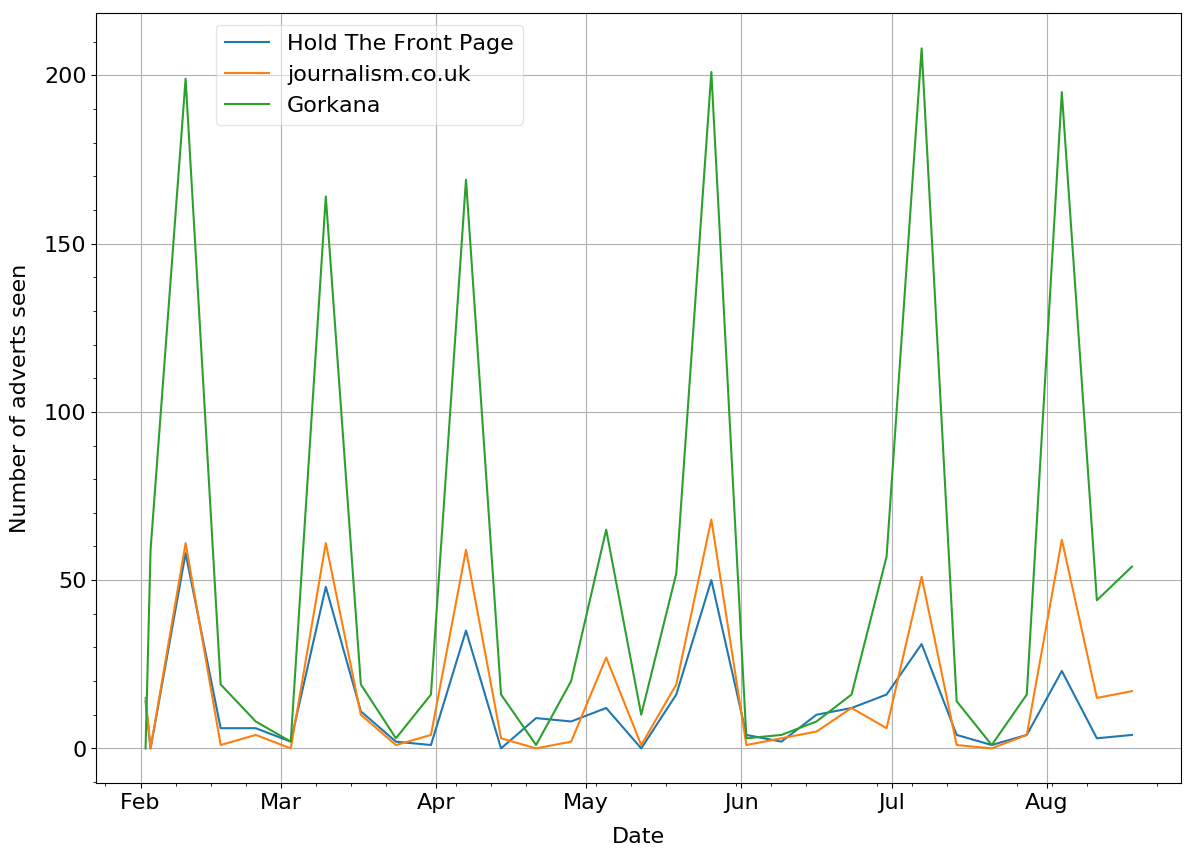

In [210]:
fig, ax = plt.subplots()

date_format = mdates.DateFormatter('%b')
ax.xaxis.set_major_formatter(date_format)
ax.minorticks_on()
ax.set_ylabel('Number of adverts seen', labelpad=10)
ax.set_xlabel('Date', labelpad=10)

ax.plot(deduped_data.index, deduped_data['htfp'], label='Hold The Front Page')
ax.plot(deduped_data.index, deduped_data['journalism'], label='journalism.co.uk')
ax.plot(deduped_data.index, deduped_data['gorkana'], label='Gorkana')

ax.legend(loc='upper left', bbox_to_anchor=(0.1, 1.0), framealpha=0.5)
plt.show()

In [213]:
role_count = Counter()

for job in combined_jobs:
    role_count[job['Role']] += 1
    
print(role_count.most_common(100))

[('Reporter', 62), ('Trainee Reporter', 39), ('Senior Reporter', 27), ('Editor', 25), ('Journalist', 17), ('Editorial assistant', 10), ('Deputy editor', 10), ('Chief Reporter', 8), ('News Editor', 8), ('Deputy Editor', 7), ('Assistant editor', 7), ('Content Editor', 7), ('Reporters', 7), ('Multimedia Journalist', 6), ('News editor', 6), ('Multimedia Reporter', 6), ('Staff writer', 6), ('Senior reporter', 5), ('Deputy News Editor', 5), ('News reporter', 5), ('News Reporter', 5), ('Photographer', 5), ("What's On Writer", 4), ('Production editor', 4), ('Which?, (Senior) Researcher / Writer', 4), ('Trainee Reporters', 4), ('Multimedia Journalist (Trainee)', 4), ('Best, Celebrity Editor', 3), ('Sub-editor', 3), ('MailOnline, Community Moderator', 3), ('Trainee Digital Journalist', 3), ('Broadcast journalist', 3), ('Mirror Online, Senior Reporter - Celebrity & TV', 3), ('RN, Reporter', 3), ('Video Journalist', 3), ('Feature Writer', 3), ('Ink, Creative Solutions Designer', 3), ('Trainee Mult

In [223]:
# Role is usually full of other information, so if we can, let's remove it

role_count = Counter()

rows = []

headers = ['source', 'original', 'corrected', 'htfp', 'journalism']
    
with open(os.path.join(CSV_OUTPUT_DIR, 'combined_date_count_by_source.csv'), 'w') as output_file:
    
    writer = csv.DictWriter(output_file, headers)
    writer.writeheader()

for job in combined_jobs:
    
    role = job['Role']
    print(job['Source'])
    print(role)
    
    # remove the employer/organisation if it's there
    splits = role.split(',')
    if len(splits) > 1:
        # journalism.co.uk is "role, organisation"
        if job['Source'] == 'journalism':
            role = splits[0]
        # everything else is "organisation, role"
        else:
            role = splits[1]
    else:
        role = splits[0]
    
    if role.find('('):
        role = role.split('(')[0]
    print(role)
    
    role_count[role.strip().rstrip('s')] += 1
    
    rows.append({
        'source': job['Source']
        'original': job['Role']
        'corrected': role
    })
    
    
    
print(role_count.most_common(40))

gorkana
POLITICO, News Editor (Brussels)
 News Editor 
gorkana
Risk.net, Financial Journalists
 Financial Journalists
gorkana
Haymarket Consumer Technology, Graduate / Staff Writer
 Graduate / Staff Writer
gorkana
Video Production Assistant
Video Production Assistant
gorkana
Acoustic, Editor
 Editor
gorkana
Reporter, MarketWatch - NY
 MarketWatch - NY
gorkana
Broadcast, Technology & Facilities Editor
 Technology & Facilities Editor
gorkana
The Economist Group, Senior Editor - Technology
 Senior Editor - Technology
gorkana
BusinessBecause, Intern - Graduate Journalism / Editorial Opportunity
 Intern - Graduate Journalism / Editorial Opportunity
gorkana
The Family, Designer
 Designer
gorkana
The Conversation UK, Deputy Community Coordinator
 Deputy Community Coordinator
gorkana
The Sunday Times, Picture Editor - Style
 Picture Editor - Style
gorkana
Square Up Media, Editorial Internship
 Editorial Internship
gorkana
William Reed, Digital Editor - New Launch Food Innovation Service
 Digit

gorkana
Daily Mail, Assistant Editor / Writer - Good Health
 Assistant Editor / Writer - Good Health
gorkana
Pharmaceutical Journal, Deputy News Editor
 Deputy News Editor
gorkana
BMI Publishing, Editorial Assistant
 Editorial Assistant
gorkana
Deputy Graphics Editor, The Wall Street Journal - NY
 The Wall Street Journal - NY
gorkana
The Sunday Times, Digital Content Editor - Style
 Digital Content Editor - Style
gorkana
News Editor
News Editor
gorkana
The Media Eye, Entertainment Research Internship
 Entertainment Research Internship
gorkana
MailOnline, Travel News Reporter - Freelance
 Travel News Reporter - Freelance
gorkana
US Correspondent, South China Morning Post - DC / NY
 South China Morning Post - DC / NY
gorkana
DailyMail.com, Motion Graphics Designer / Video Editor - Snapchat Discover
 Motion Graphics Designer / Video Editor - Snapchat Discover
gorkana
Mirror Online, Senior Reporter - Celebrity & TV
 Senior Reporter - Celebrity & TV
gorkana
Gas Matters, Editor
 Editor
gorka

gorkana
LexisNexis, Senior Reporter / Writer
 Senior Reporter / Writer
gorkana
GlobalCapital, Corporate Bond Editor
 Corporate Bond Editor
gorkana
Insight Editor – Content Strategist, Senior Editor
 Senior Editor
gorkana
Pharmaceutical Journal, Content Editor - People & Careers
 Content Editor - People & Careers
gorkana
EQDerivatives, Head of Content - Asia Pacific (Hong Kong)
 Head of Content - Asia Pacific 
gorkana
Archant Dialogue, Assistant Editor
 Assistant Editor
gorkana
Property Week, Senior / Chief Reporter
 Senior / Chief Reporter
gorkana
MandateWire Europe, Reporter
 Reporter
gorkana
ITV, Assistant Producer - Loose Women, Maternity Cover
 Assistant Producer - Loose Women
gorkana
Telegraph Media Group, Assistant Planning Editor
 Assistant Planning Editor
gorkana
OTC bulletin, Assistant Editor
 Assistant Editor
gorkana
Culture Trip, Tech & Entrepreneurship Editor
 Tech & Entrepreneurship Editor
gorkana
Immediate Media, Art Editor - Women’s Portfolio, New Launch
 Art Editor - Wo

Features Writer
htfp
Assistant Editor
Assistant Editor
htfp
Media and Digital Media Officer
Media and Digital Media Officer
htfp
Trainee Reporter
Trainee Reporter
htfp
Health Correspondent
Health Correspondent
htfp
Digital Editor
Digital Editor
htfp
Digital Editor
Digital Editor
htfp
Content Editor (Print Production) Sport
Content Editor 
htfp
Online Community Content Curator
Online Community Content Curator
htfp
Multimedia Journalist (Trainee) x2
Multimedia Journalist 
htfp
News Editor (Homepages Editor)
News Editor 
htfp
Trainee Digital Journalist
Trainee Digital Journalist
htfp
Multimedia Journalist
Multimedia Journalist
htfp
Reporter
Reporter
htfp
Sports Reporter
Sports Reporter
htfp
Online Editor
Online Editor
htfp
Senior Reporter
Senior Reporter
htfp
Digital Reporter
Digital Reporter
htfp
Chief Reporter
Chief Reporter
htfp
B2B Writer
B2B Writer
htfp
Multimedia Trainee Reporter
Multimedia Trainee Reporter
htfp
Regional Head of News
Regional Head of News
htfp
Trainee Reporters
Trai